In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('..')

from helpers.data_loading import load_data_from_dir
from helpers.test_model import relative_l2_error

2024-04-24 14:04:12.395946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Pysteps configuration file found at: /home/meliao/miniconda3/envs/jax_inv_scat/lib/python3.11/site-packages/pysteps/pystepsrc



In [18]:
best_dir = '/net/projects/willettlab/meliao/recursive-linearization/generated/2024-04-22_train_WideBNet_3_freq_50_5e-04_0.85_1.5_16'

preds_fp = os.path.join(best_dir, 'eta_pred.npy')
eta_preds = np.load(preds_fp)

In [19]:
# def load_data_from_dir(
#     dir: str,
#     standardize_eta_bool: bool,
#     L: int,
#     s: int,
#     wavenumbers: Tuple[int] = None,
#     blur_sigma: float = None,
#     eta_mean: np.ndarray = None,
#     eta_std: np.ndarray = None,
#     scatter_means: np.ndarray = None,
#     scatter_stds: np.ndarray = None,
#     truncate_num: int = None,
# )

# /net/projects/willettlab/meliao/recursive-linearization/generated/2024-04-22_train_WideBNet_3_freq_20_1e-03_0.95_1.125_16

In [20]:
test_data = load_data_from_dir(dir='/net/projects/willettlab/meliao/recursive-linearization/dataset/test_measurements_nu_{}/',
                               standardize_eta_bool=False,
                               L=4,
                               s=12,
                               wavenumbers=['4', '8', '16'])

Loading data from directory:  /net/projects/willettlab/meliao/recursive-linearization/dataset/test_measurements_nu_{}/


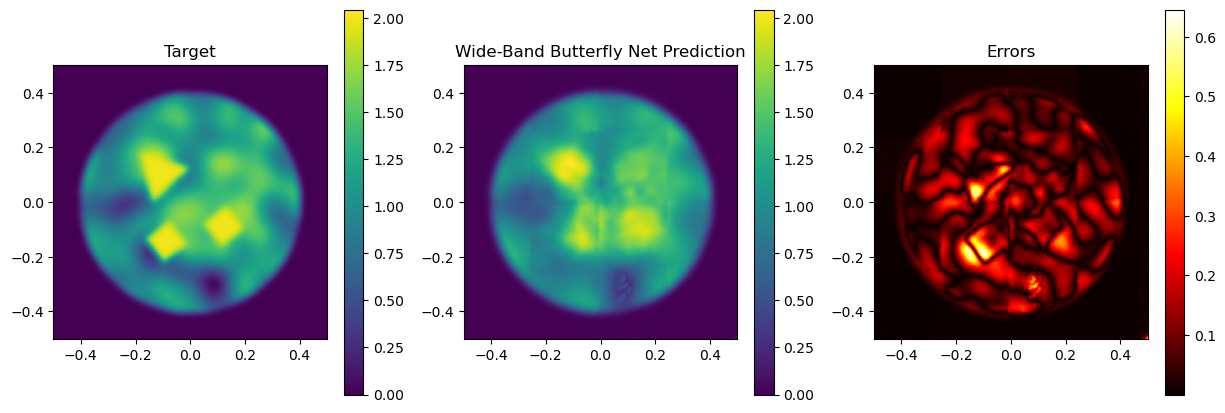

<Figure size 640x480 with 0 Axes>

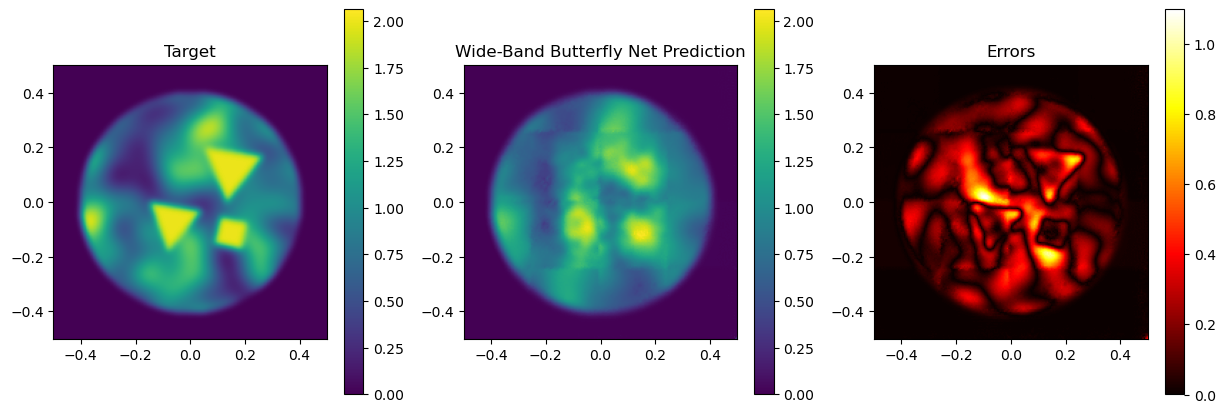

<Figure size 640x480 with 0 Axes>

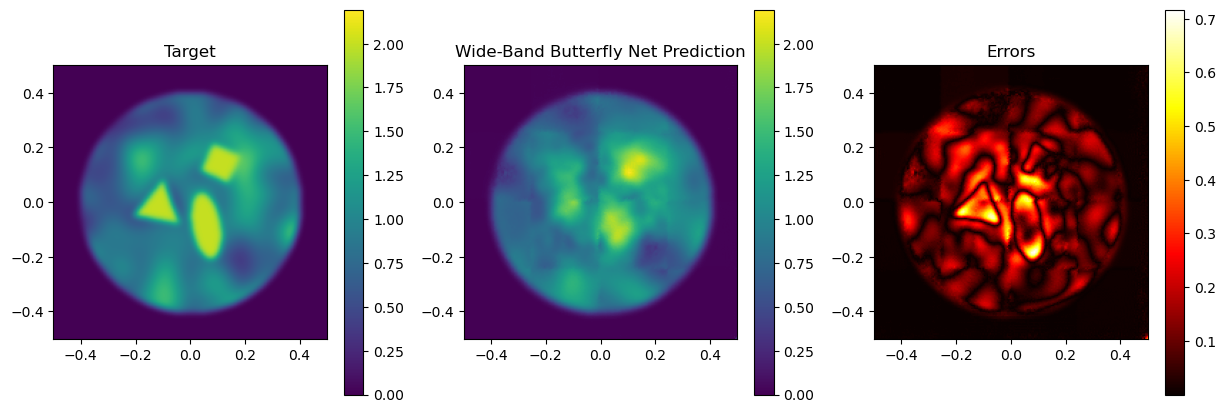

<Figure size 640x480 with 0 Axes>

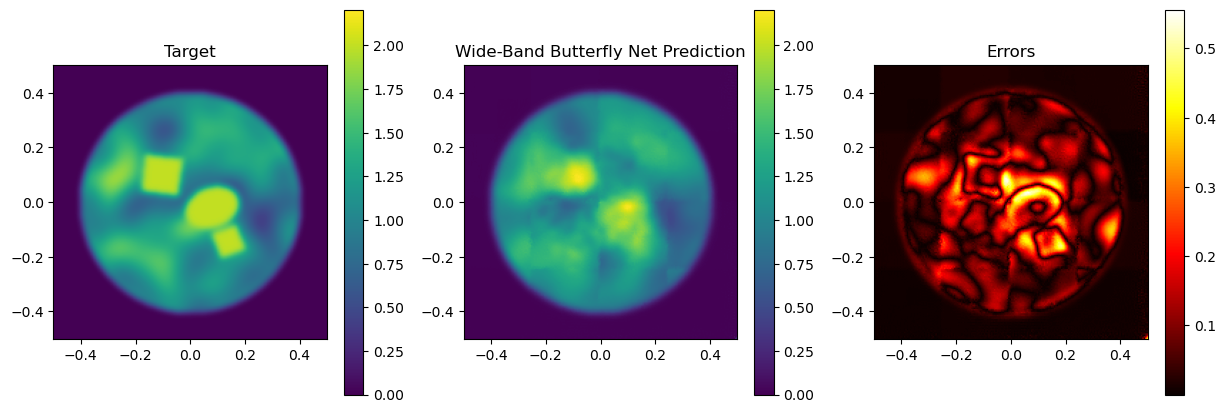

<Figure size 640x480 with 0 Axes>

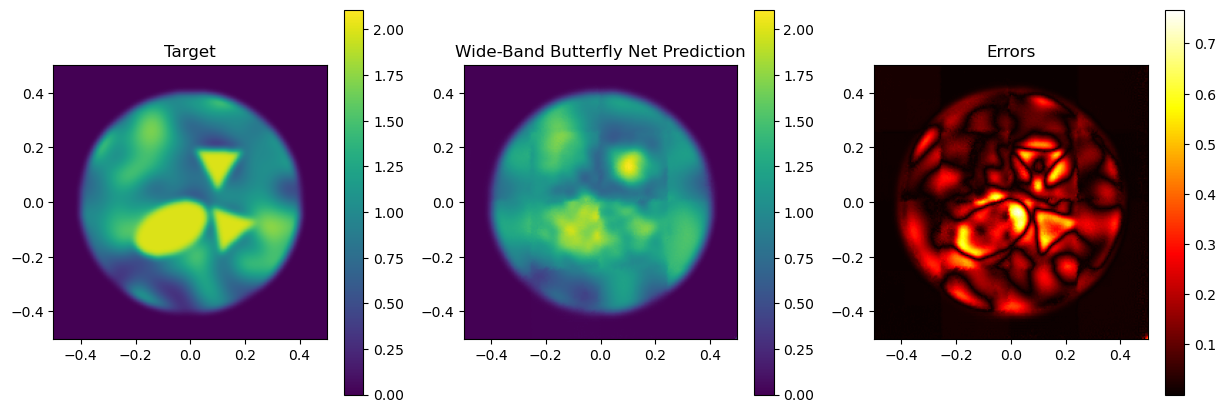

<Figure size 640x480 with 0 Axes>

In [21]:
test_etas = test_data[1]

extent=np.array([-0.5, 0.5, -0.5, 0.5])
for i in range(5):

    mm = max(eta_preds[i].max(), test_etas[i].max())
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    im_0 = ax[0].imshow(test_etas[i], extent=extent)
    im_0.set_clim(0., mm)
    plt.colorbar(im_0, ax=ax[0])
    ax[0].set_title('Target')

    im_1 = ax[1].imshow(eta_preds[i], extent=extent)
    im_1.set_clim(0., mm)
    plt.colorbar(im_1, ax=ax[1])
    ax[1].set_title('Wide-Band Butterfly Net Prediction')

    im_2 = ax[2].imshow(np.abs(eta_preds[i] - test_etas[i]), cmap='hot', extent=extent)
    plt.colorbar(im_2, ax=ax[2])
    ax[2].set_title('Errors')

    plt.show()
    plt.clf()

## Compute relative L2 errors

In [22]:
rel_l2_errs = relative_l2_error(pred=eta_preds, target=test_etas)

In [23]:
print(np.mean(rel_l2_errs))

0.1595454265126067


In [24]:
print(np.std(rel_l2_errs))

0.03698035314839805


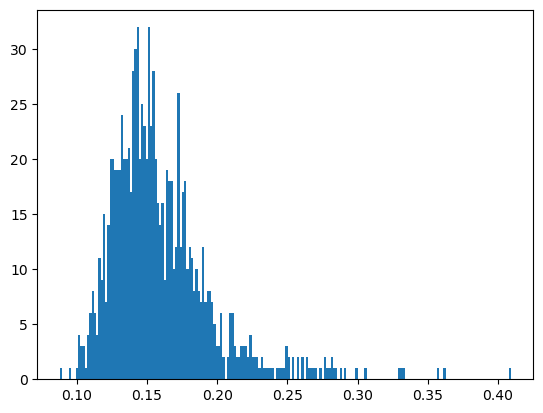

In [25]:
plt.hist(rel_l2_errs, bins=200)
plt.show()